<a href="https://colab.research.google.com/github/dpanagop/ML_and_AI_examples/blob/master/Image_Classification_with_and_without_convlolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Example of image classification with neural network

###First, we load the necessary libraries

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

###Then, we load Fashion MINST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


###Label number correspond to:
| Label| Class|
|---------|----------|
| 0  | T-shirt/top|
| 1  | Trouser|
| 2  | Pullover|
| 3  | Dress|
| 4  | Coat|
| 5  | Sandal|
| 6  | Shirt|
| 7  | Sneaker|
| 8  | bag|
| 9  | Ankle boot|

###We store correspondence in class_names variable

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###We can see an example

6 3
Shirt Shirt


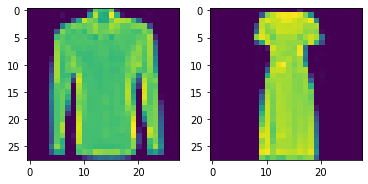

In [4]:
f, ax = plt.subplots(1,2)
ax[0].imshow(train_images[40])
ax[1].imshow(train_images[50])
print(train_labels[40],train_labels[50])
print(class_names[6],class_names[6])

###Next, we normalise data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0


#Simple neural net

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

###Next, compile the model

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

###Train model

In [32]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1739 - acc: 0.9341
Epoch 2/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1711 - acc: 0.9362
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1671 - acc: 0.9366
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1649 - acc: 0.9383
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1578 - acc: 0.9410
Epoch 6/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1566 - acc: 0.9410
Epoch 7/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1504 - acc: 0.9447
Epoch 8/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1476 - acc: 0.9449
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1454 - acc: 0.9447
Epoch 10/10
60000/60000 [==============================] - 

###Predict class of second image in test dataset

In [24]:
prediction=model.predict(test_images[1].reshape(1, 28, 28))
print("Probabilities of image in each class are",prediction)
print("Highest probability in place:", prediction.argmax())
print("Image is classified as a: ",class_names[prediction.argmax()])

Probabilities of image in each class are [[1.4792593e-05 7.4572272e-15 9.9984133e-01 1.0109936e-13 9.9008597e-05
  8.3782468e-15 4.4799071e-05 7.3859103e-23 1.0118387e-09 6.3930431e-16]]
Highest probability in place: 2
Image is classified as a:  Pullover


Actual label number is: 2
Image is a:  Pullover


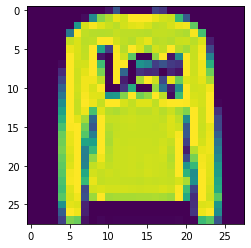

In [10]:
print("Actual label number is:",test_labels[1])
print("Image is a: ",class_names[test_labels[1]])
plt.imshow(test_images[1])


Second image is a pullover and it is classified correctly.

###Evaluate models accuracy

In [33]:
test_acc = model.evaluate(test_images, test_labels)
print('Test loss, accuracy:', test_acc)


10000/10000 [==============================] - 0s 32us/sample - loss: 0.4091 - acc: 0.8865
Test accuracy: [0.4091187917113304, 0.8865]


The overal model's accuracy is very low. This in part because of the low number of training epochs. Next, we will create a convolution neural network and compare the performance of the two models.

## Convolution Neural Network

In [0]:
cnn_train_images=train_images.reshape(60000, 28, 28, 1)
cnn_test_images = test_images.reshape(10000, 28, 28, 1)

In [0]:
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
cnn_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
cnn_model.fit(cnn_train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 36s 604us/sample - loss: 0.3938 - acc: 0.8609
Epoch 2/10
60000/60000 [==============================] - 36s 596us/sample - loss: 0.2643 - acc: 0.9043
Epoch 3/10
60000/60000 [==============================] - 36s 595us/sample - loss: 0.2214 - acc: 0.9185
Epoch 4/10
60000/60000 [==============================] - 36s 596us/sample - loss: 0.1910 - acc: 0.9294
Epoch 5/10
60000/60000 [==============================] - 36s 592us/sample - loss: 0.1613 - acc: 0.9407
Epoch 6/10
60000/60000 [==============================] - 35s 591us/sample - loss: 0.1386 - acc: 0.9488
Epoch 7/10
60000/60000 [==============================] - 35s 590us/sample - loss: 0.1174 - acc: 0.9567
Epoch 8/10
60000/60000 [==============================] - 36s 594us/sample - loss: 0.1005 - acc: 0.9628
Epoch 9/10
60000/60000 [==============================] - 36s 597us/sample - loss: 0.0848 - acc: 0.9688
Epoch 10/10
60000/60000 [================

In [37]:
test_cnn_acc = cnn_model.evaluate(cnn_test_images, test_labels)
print('Test loss, accuracy:', test_cnn_acc)


10000/10000 [==============================] - 2s 200us/sample - loss: 0.3218 - acc: 0.9175
Test loss, accuracy: [0.32177444730997085, 0.9175]
